In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [49]:
data = pd.read_csv('/Users/lianxiaobao/lianxiaobao/bigdatabook/daletou.csv')
data.head()

,Unnamed: 0,first_prize,first_prize_size,prize_pool,resrult_bef1,resrult_bef2,resrult_bef3,resrult_bef4,resrult_bef5,resrult_beh1,resrult_beh2,result_day,result_num,second_prize,second_prize_size,total_bet_amount
0,0,"10,000,000",4,"2,450,995,411",3,6,9,23,34,2,11,2019/10/19,19119,"611,893",83,"296,906,555"
1,1,"10,000,000",2,"2,505,219,109",2,3,13,19,26,2,3,2019/10/16,19118,"406,469",101,"272,734,633"
2,2,"10,000,000",4,"2,510,705,016",1,18,21,25,35,7,8,2019/10/14,19117,"806,808",66,"271,077,215"
3,3,"10,000,000",4,"2,540,591,129",2,10,16,21,23,2,12,2019/10/12,19116,"770,679",87,"297,819,968"
4,4,"10,000,000",6,"2,576,114,778",1,18,21,28,32,5,12,2019/10/9,19115,"498,979",105,"286,493,206"


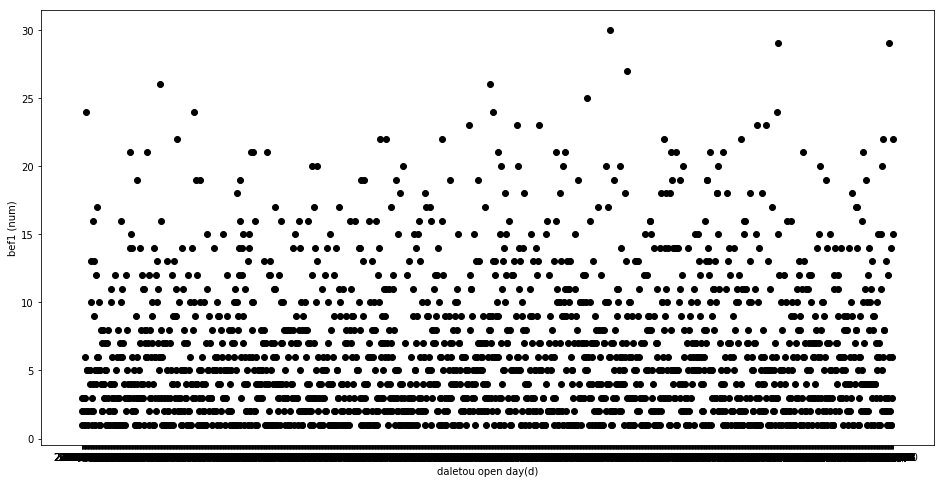

In [22]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['result_day'],
    data['resrult_bef1'],
    c='black'
)
plt.xlabel("daletou open day(d)")
plt.ylabel("bef1 (num)")
plt.show()

In [23]:
data.columns

Index(['Unnamed: 0', 'first_prize', 'first_prize_size', 'prize_pool',
       'resrult_bef1', 'resrult_bef2', 'resrult_bef3', 'resrult_bef4',
       'resrult_bef5', 'resrult_beh1', 'resrult_beh2', 'result_day',
       'result_num', 'second_prize', 'second_prize_size', 'total_bet_amount'],
      dtype='object')

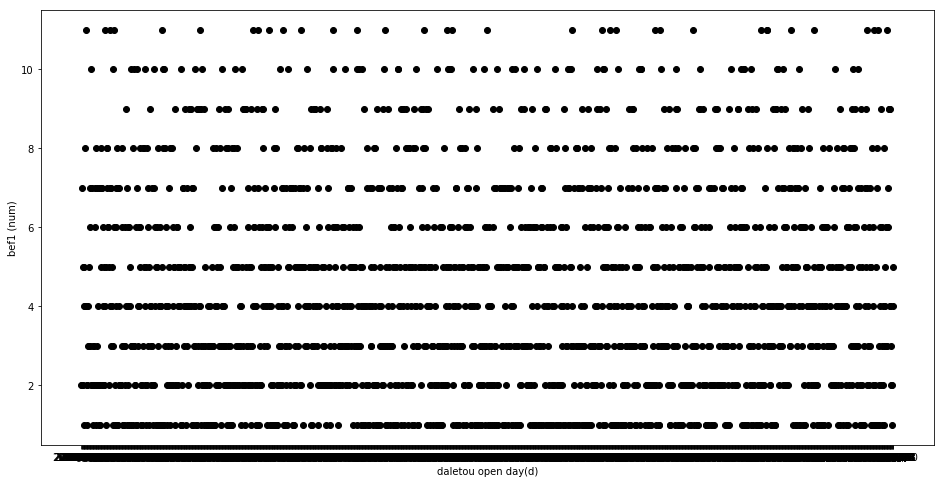

In [24]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['result_day'],
    data['resrult_beh1'],
    c='black'
)
plt.xlabel("daletou open day(d)")
plt.ylabel("bef1 (num)")
plt.show()

In [55]:
X = data['Unnamed: 0'].values.reshape(-1,1)
y = data['resrult_bef1'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_[0][0])
print(reg.intercept_[0])

0.0007193466601768446
5.6506553914011715


In [53]:
print("The huigui model is: Y = {:.6} + {:.6}X".format(reg.intercept_[0], reg.coef_[0][0]))

The huigui model is: Y = 5.65066 + 0.000719347X


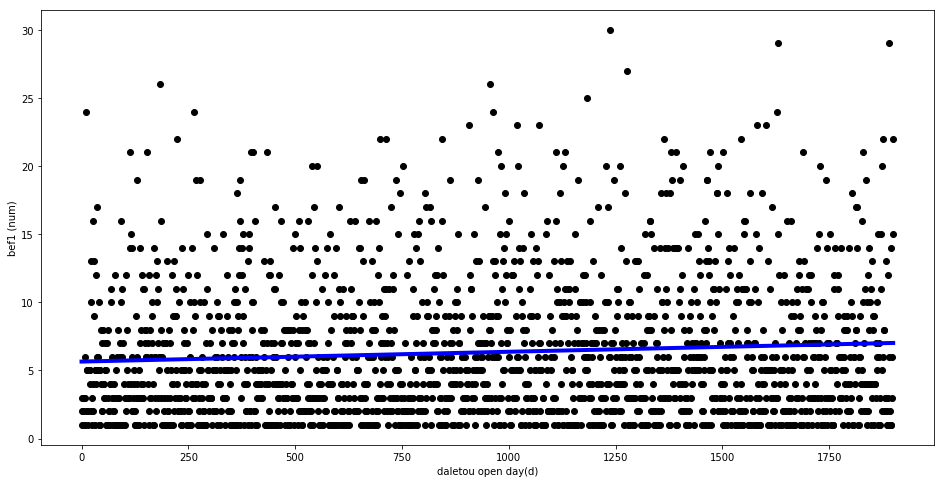

In [40]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Unnamed: 0'],
    data['resrult_bef1'],
    c='black'
)
plt.plot(
    data['Unnamed: 0'],
    predictions,
    c='blue',
    linewidth=4
)
plt.xlabel("daletou open day(d)")
plt.ylabel("bef1 (num)")
plt.show()

In [44]:
X = data['Unnamed: 0']
y = data['resrult_bef1']
X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
result = model.fit()

result.params

const         5.650655
Unnamed: 0    0.000719
dtype: float64

In [46]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:           resrult_bef1   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     11.54
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           0.000696
Time:                        19:20:31   Log-Likelihood:                -5781.4
No. Observations:                1901   AIC:                         1.157e+04
Df Residuals:                    1899   BIC:                         1.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6507      0.232     24.319      0.0

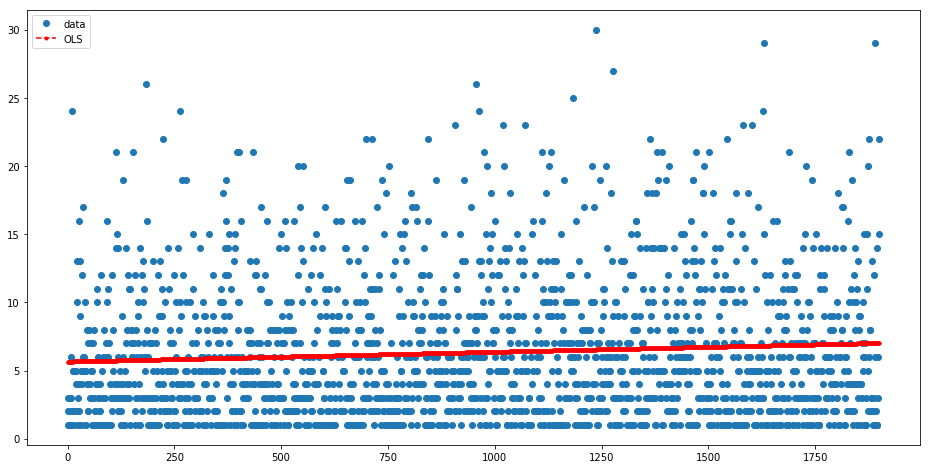

In [48]:
# 中间偏下的 coef 列就是计算出的回归系数。
# 我们还可以将拟合结果画出来。先调用拟合结果的 fittedvalues 得到拟合的 y 值。
y_fitted = result.fittedvalues

# 然后使用 matplotlib.pyploft 画图。首先设定图轴，图片大小为 16×8。
fig, ax = plt.subplots(figsize=(16,8))

# 画出原数据，图像为圆点，默认颜色为蓝。
ax.plot(X, y, 'o', label='data')

# 画出拟合数据，图像为红色带点间断线。
ax.plot(X, y_fitted, 'r--.',label='OLS')

# 放置注解。
ax.legend(loc='best')